In [ ]:
# import independencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter


In [ ]:
#import ML independencies
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [206]:
#Reading sample file into a dataframe
#file_path = Path('Datasource/sample_covid_dataset.csv')
file_path = Path('Datasource/sample_covid_dataset.csv')
cases_df = pd.read_csv(file_path)
cases_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,...,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,0,9,9,353345,353346,353346,2020-12-14T00:00:00,2020-12-20T00:00:00,2020-12-20T00:00:00,2020-12-16T00:00:00,...,Resolved,Yes,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,1,15,15,35074,35075,35075,2020-11-08T00:00:00,2020-11-09T00:00:00,2020-11-09T00:00:00,2020-11-08T00:00:00,...,Resolved,Yes,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,2,16,16,131940,131941,131941,2021-02-03T00:00:00,2021-02-05T00:00:00,2021-02-05T00:00:00,2021-02-03T00:00:00,...,Resolved,Yes,2246,Niagara Region Public Health Department,1815 Sir Isaac Brock Way,Thorold,L2V 4T7,www.niagararegion.ca/health,43.116537,-79.241220
3,3,24,24,205768,205769,205769,2020-12-24T00:00:00,2020-12-29T00:00:00,2020-12-29T00:00:00,2020-11-26T00:00:00,...,Resolved,Yes,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
4,4,26,26,387017,387018,387018,2021-01-21T00:00:00,2021-01-23T00:00:00,2021-01-23T00:00:00,2021-01-21T00:00:00,...,Resolved,Yes,2246,Niagara Region Public Health Department,1815 Sir Isaac Brock Way,Thorold,L2V 4T7,www.niagararegion.ca/health,43.116537,-79.241220


# Cleaning Data 

In [207]:
# Check the columns

cases_df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       '_id', 'Row_ID', 'Accurate_Episode_Date', 'Case_Reported_Date',
       'Test_Reported_Date', 'Specimen_Date', 'Age_Group', 'Client_Gender',
       'Case_AcquisitionInfo', 'Outcome1', 'Outbreak_Related',
       'Reporting_PHU_ID', 'Reporting_PHU', 'Reporting_PHU_Address',
       'Reporting_PHU_City', 'Reporting_PHU_Postal_Code',
       'Reporting_PHU_Website', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude'],
      dtype='object')

In [208]:
# Drop unrelated columns from dataframe

columns_to_drop=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1', '_id', 'Row_ID', 'Outbreak_Related',
                'Case_Reported_Date','Test_Reported_Date','Specimen_Date', 'Case_AcquisitionInfo','Reporting_PHU','Reporting_PHU_Address', 
                'Reporting_PHU_City' , 'Reporting_PHU_Postal_Code',  'Reporting_PHU_Website',
                'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'
               ]
cleaned_cases_df = cases_df.drop(columns= columns_to_drop)


In [209]:
cleaned_cases_df.columns

Index(['Accurate_Episode_Date', 'Age_Group', 'Client_Gender', 'Outcome1',
       'Reporting_PHU_ID'],
      dtype='object')

In [210]:
# Rename columns to short version

cleaned_cases_df = cleaned_cases_df.rename(columns={"Accurate_Episode_Date": "Date",'Client_Gender':"Gender",
                                                    'Outcome1':'Outcome','Reporting_PHU_ID':'PHU_id'})
cleaned_cases_df.columns

Index(['Date', 'Age_Group', 'Gender', 'Outcome', 'PHU_id'], dtype='object')

In [211]:
cleaned_cases_df

,Date,Age_Group,Gender,Outcome,PHU_id
0,2020-12-14T00:00:00,70s,FEMALE,Resolved,3895
1,2020-11-08T00:00:00,<20,FEMALE,Resolved,3895
2,2021-02-03T00:00:00,20s,MALE,Resolved,2246
3,2020-12-24T00:00:00,20s,MALE,Resolved,3895
4,2021-01-21T00:00:00,90+,FEMALE,Resolved,2246
...,...,...,...,...,...
13519,2021-03-15T00:00:00,20s,FEMALE,Resolved,2253
13520,2021-01-06T00:00:00,80s,FEMALE,Resolved,2261
13521,2021-02-07T00:00:00,80s,FEMALE,Resolved,3895
13522,2021-01-17T00:00:00,40s,FEMALE,Resolved,2253


In [212]:
# Convert the target column values to Resolved and Not_Resolved 
x = {'Fatal': 'Not_Recovered','Not Resolved':'Not_Recovered','Resolved':'Recovered'}   
cleaned_cases_df = cleaned_cases_df.replace(x)

In [213]:
cleaned_cases_df.Outcome.value_counts()

Resolved    12398
Fatal         811
Name: Outcome, dtype: int64

In [215]:
#Converting date column

cleaned_cases_df['Date'] = pd.to_datetime(cleaned_cases_df['Date'], errors='coerce')

In [216]:
#Breaking Date column  to week, month and year 

cleaned_cases_df['Week'] = cleaned_cases_df['Date'].dt.week
cleaned_cases_df['Month'] = cleaned_cases_df['Date'].dt.month
cleaned_cases_df['Year'] = cleaned_cases_df['Date'].dt.year

C:\Users\16472\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [217]:
#cleaned_cases_df

In [218]:
# Drop Date column

cleaned_cases_df = cleaned_cases_df.drop(columns=['Date'])

In [219]:
cleaned_cases_df 

,Age_Group,Gender,Outcome,PHU_id,Week,Month,Year
0,70s,FEMALE,Resolved,3895,51,12,2020
1,<20,FEMALE,Resolved,3895,45,11,2020
2,20s,MALE,Resolved,2246,5,2,2021
3,20s,MALE,Resolved,3895,52,12,2020
4,90+,FEMALE,Resolved,2246,3,1,2021
...,...,...,...,...,...,...,...
13519,20s,FEMALE,Resolved,2253,11,3,2021
13520,80s,FEMALE,Resolved,2261,1,1,2021
13521,80s,FEMALE,Resolved,3895,5,2,2021
13522,40s,FEMALE,Resolved,2253,2,1,2021


In [220]:
# Saving the dataframe into csv file
cases_df.to_csv('Datasource/cleaned_covid_data.csv')

In [221]:
# check the count of each PHU

PHU_count =cleaned_cases_df.PHU_id.value_counts()
PHU_count

3895    3511
2253    2015
2270     932
2251     794
2246     706
2268     697
2237     600
2230     587
2265     512
2236     457
2260     374
2244     368
2266     269
2262     193
4913     152
2258     116
2234     109
2243      95
2242      92
2261      86
2227      71
5183      69
2235      63
2249      52
2240      48
2241      44
2238      37
2255      33
2233      31
2256      30
2257      27
2247      17
2226      12
2263      10
Name: PHU_id, dtype: int64

In [222]:
# Check the count of cases based on Gender

Gender_count =cleaned_cases_df.Gender.value_counts()
Gender_count

FEMALE            7178
MALE              5924
UNSPECIFIED        105
GENDER DIVERSE       2
Name: Gender, dtype: int64

In [223]:
# Check the count of cases based on Age group

age_count =cleaned_cases_df.Age_Group.value_counts()
age_count

50s    1933
20s    1920
40s    1885
30s    1803
<20    1404
80s    1310
60s    1136
90+    1033
70s     785
Name: Age_Group, dtype: int64

In [224]:
# Grouped cases by PHU, Week, month and year

cases_per_PHU_df = cleaned_cases_df.groupby(['PHU_id','Week', 'Month','Year']).count()
cases_per_PHU_df

Age_Group  Gender  Outcome
PHU_id Week Month Year                            
2226   1    1     2021          1       1        1
       2    1     2021          1       1        1
       4    1     2021          2       2        2
       12   3     2021          1       1        1
       13   3     2020          1       1        1
...                           ...     ...      ...
5183   50   12    2020          2       2        2
       51   12    2020          3       3        3
       52   12    2020          2       2        2
       53   1     2021          6       6        6
            12    2020          3       3        3

[1210 rows x 3 columns]

In [225]:
# count cases by PHU

count_by_PHU = cases_per_PHU_df.groupby(['PHU_id']).sum()
count_by_PHU

,Age_Group,Gender,Outcome
PHU_id,,,
2226,12,12,12
2227,71,71,71
2230,587,587,587
2233,31,31,31
2234,109,109,109
2235,63,63,63
2236,457,457,457
2237,600,600,600
2238,37,37,37


# Processing Data for ML 

In [226]:
cleaned_cases_df

,Age_Group,Gender,Outcome,PHU_id,Week,Month,Year
0,70s,FEMALE,Resolved,3895,51,12,2020
1,<20,FEMALE,Resolved,3895,45,11,2020
2,20s,MALE,Resolved,2246,5,2,2021
3,20s,MALE,Resolved,3895,52,12,2020
4,90+,FEMALE,Resolved,2246,3,1,2021
...,...,...,...,...,...,...,...
13519,20s,FEMALE,Resolved,2253,11,3,2021
13520,80s,FEMALE,Resolved,2261,1,1,2021
13521,80s,FEMALE,Resolved,3895,5,2,2021
13522,40s,FEMALE,Resolved,2253,2,1,2021


In [227]:
cleaned_cases_df.dtypes

Age_Group    object
Gender       object
Outcome      object
PHU_id        int64
Week          int64
Month         int64
Year          int64
dtype: object

In [228]:
# Generate our categorical variable list excet PHU
covid_cat = cleaned_cases_df.dtypes[cleaned_cases_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
cleaned_cases_df[covid_cat].nunique()

Age_Group    9
Gender       4
Outcome      2
dtype: int64

In [229]:
# Create a OneHotEncoder instance, Sparse = false returns an array otherwise it returns a matrix
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cleaned_cases_df[covid_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(covid_cat)

#change the column names to remove the space
encode_df = encode_df.rename(columns={'Gender_GENDER DIVERSE':'Gender_GENDER_DIVERSE'})

encode_df.head()

,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_70s,Age_Group_80s,Age_Group_90+,Age_Group_<20,Gender_FEMALE,Gender_GENDER_DIVERSE,Gender_MALE,Gender_UNSPECIFIED,Outcome_Fatal,Outcome_Resolved
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [230]:
# Merge the two DataFrames together and drop the PHU_id column
cat_df = cleaned_cases_df.merge(encode_df,left_index=True,right_index=True)

cat_df

,Age_Group,Gender,Outcome,PHU_id,Week,Month,Year,Age_Group_20s,Age_Group_30s,Age_Group_40s,...,Age_Group_70s,Age_Group_80s,Age_Group_90+,Age_Group_<20,Gender_FEMALE,Gender_GENDER_DIVERSE,Gender_MALE,Gender_UNSPECIFIED,Outcome_Fatal,Outcome_Resolved
0,70s,FEMALE,Resolved,3895,51,12,2020,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,<20,FEMALE,Resolved,3895,45,11,2020,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,20s,MALE,Resolved,2246,5,2,2021,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,20s,MALE,Resolved,3895,52,12,2020,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,90+,FEMALE,Resolved,2246,3,1,2021,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13204,20s,FEMALE,Resolved,2237,7,2,2021,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13205,70s,FEMALE,Resolved,2230,16,4,2020,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13206,60s,MALE,Resolved,3895,13,3,2020,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13207,50s,FEMALE,Resolved,2260,18,5,2020,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [231]:
# drop categorial columns
cat_df = cat_df.drop(columns=['Age_Group','Gender','Outcome'])
cat_df

,PHU_id,Week,Month,Year,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_70s,Age_Group_80s,Age_Group_90+,Age_Group_<20,Gender_FEMALE,Gender_GENDER_DIVERSE,Gender_MALE,Gender_UNSPECIFIED,Outcome_Fatal,Outcome_Resolved
0,3895,51,12,2020,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3895,45,11,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2246,5,2,2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3895,52,12,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2246,3,1,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13204,2237,7,2,2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13205,2230,16,4,2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13206,3895,13,3,2020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13207,2260,18,5,2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [232]:
cat_df.dtypes

PHU_id                     int64
Week                       int64
Month                      int64
Year                       int64
Age_Group_20s            float64
Age_Group_30s            float64
Age_Group_40s            float64
Age_Group_50s            float64
Age_Group_60s            float64
Age_Group_70s            float64
Age_Group_80s            float64
Age_Group_90+            float64
Age_Group_<20            float64
Gender_FEMALE            float64
Gender_GENDER_DIVERSE    float64
Gender_MALE              float64
Gender_UNSPECIFIED       float64
Outcome_Fatal            float64
Outcome_Resolved         float64
dtype: object

In [233]:
# Check the unique value counts to see if binning is required
# PHU ID
PHU_count =cat_df.PHU_id.value_counts()
PHU_count

3895    3434
2253    1971
2270     912
2251     773
2268     686
2246     685
2237     586
2230     568
2265     502
2236     449
2260     369
2244     356
2266     262
2262     189
4913     148
2258     114
2234     107
2243      93
2242      91
2261      82
5183      68
2227      66
2235      63
2249      50
2240      48
2241      43
2238      37
2255      32
2233      30
2256      27
2257      26
2247      16
2226      12
2263       9
Name: PHU_id, dtype: int64

<AxesSubplot:ylabel='Density'>

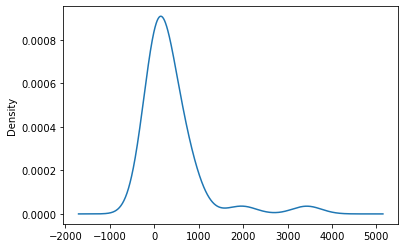

In [234]:
# Visualize the value counts
PHU_count.plot.density()

In [235]:
# Determine which values to replace
replace_PHU = list(PHU_count[PHU_count < 400].index)
replace_PHU

[2260,
 2244,
 2266,
 2262,
 4913,
 2258,
 2234,
 2243,
 2242,
 2261,
 5183,
 2227,
 2235,
 2249,
 2240,
 2241,
 2238,
 2255,
 2233,
 2256,
 2257,
 2247,
 2226,
 2263]

In [236]:
# Replace in DataFrame
for phu in replace_PHU:
    cat_df.PHU_id = cat_df.PHU_id.replace(phu,"Other")

In [237]:
# Check to make sure binning was successful
cat_df.PHU_id.value_counts()

3895     3434
Other    2338
2253     1971
2270      912
2251      773
2268      686
2246      685
2237      586
2230      568
2265      502
2236      449
Name: PHU_id, dtype: int64

In [239]:
#Converting PHU_id to categorial feature
cat_df['PHU_id'] = cleaned_cases_df.PHU_id.astype(str) 

In [240]:
# Create the OneHotEncoder instance 

enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame for PHU_ids
encode_df = pd.DataFrame(enc.fit_transform(cat_df.PHU_id.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['PHU'])
encode_df.head()

,PHU_2226,PHU_2227,PHU_2230,PHU_2233,PHU_2234,PHU_2235,PHU_2236,PHU_2237,PHU_2238,PHU_2240,...,PHU_2261,PHU_2262,PHU_2263,PHU_2265,PHU_2266,PHU_2268,PHU_2270,PHU_3895,PHU_4913,PHU_5183
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
# Merge the two DataFrames together and drop the PHU_id column
covid_df = cat_df.merge(encode_df,left_index=True,right_index=True).drop('PHU_id',1)

covid_df

,Week,Month,Year,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_70s,Age_Group_80s,...,PHU_2261,PHU_2262,PHU_2263,PHU_2265,PHU_2266,PHU_2268,PHU_2270,PHU_3895,PHU_4913,PHU_5183
0,51,12,2020,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,45,11,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,2,2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,12,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,1,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,13,3,2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12900,43,10,2020,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12901,10,3,2021,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12902,45,11,2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
covid_df.columns

Index(['Week', 'Month', 'Year', 'Age_Group_20s', 'Age_Group_30s',
       'Age_Group_40s', 'Age_Group_50s', 'Age_Group_60s', 'Age_Group_70s',
       'Age_Group_80s', 'Age_Group_90+', 'Age_Group_<20', 'Gender_FEMALE',
       'Gender_GENDER_DIVERSE', 'Gender_MALE', 'Gender_UNSPECIFIED',
       'Outcome_Fatal', 'Outcome_Resolved', 'PHU_2226', 'PHU_2227', 'PHU_2230',
       'PHU_2233', 'PHU_2234', 'PHU_2235', 'PHU_2236', 'PHU_2237', 'PHU_2238',
       'PHU_2240', 'PHU_2241', 'PHU_2242', 'PHU_2243', 'PHU_2244', 'PHU_2246',
       'PHU_2247', 'PHU_2249', 'PHU_2251', 'PHU_2253', 'PHU_2255', 'PHU_2256',
       'PHU_2257', 'PHU_2258', 'PHU_2260', 'PHU_2261', 'PHU_2262', 'PHU_2263',
       'PHU_2265', 'PHU_2266', 'PHU_2268', 'PHU_2270', 'PHU_3895', 'PHU_4913',
       'PHU_5183'],
      dtype='object')

In [260]:
# Remove 'Active_cases' target from features data
y = covid_df.Outcome_Fatal
X = covid_df.drop(columns = ['Outcome_Fatal','Outcome_Resolved'])

In [261]:
# Split our preprocessed data into our features and target arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# RandomForest Classifier

In [262]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.920


In [263]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2877,82
Actual 1,171,22


In [264]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)

In [265]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2877,82
Actual 1,171,22


Accuracy Score : 0.9197335025380711
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2959
         1.0       0.21      0.11      0.15       193

    accuracy                           0.92      3152
   macro avg       0.58      0.54      0.55      3152
weighted avg       0.90      0.92      0.91      3152

